In [3]:
import pandas as pd 
data=pd.read_csv("data.csv")
data.head()

,鍚屽,鍚屽績,鍚屽織,鍚屾剰,鍚屾瘮,鍚岃垷,鍚岃,鍚岃,鍚岃璺?鍚岄€?鍚岄,鍚嶅北,...,Unnamed: 4539,Unnamed: 4540,Unnamed: 4541,Unnamed: 4542,Unnamed: 4543,Unnamed: 4544,Unnamed: 4545,Unnamed: 4546,Unnamed: 4547,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.shape

(500, 4548)

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 4548 entries, 鍚屽 to Unnamed: 4547
dtypes: float64(4548)
memory usage: 17.3 MB


In [6]:
x.isnull().mean()

鍚屽              0.0
鍚屽績              0.0
鍚屽織              0.0
鍚屾剰              0.0
鍚屾瘮              0.0
                ... 
Unnamed: 4543    0.0
Unnamed: 4544    0.0
Unnamed: 4545    0.0
Unnamed: 4546    0.0
Unnamed: 4547    0.0
Length: 4548, dtype: float64

In [7]:
y.shape

(500,)

In [8]:
y.value_counts()

1    264
0    236
Name: Label, dtype: int64

In [9]:
from sklearn.feature_selection import VarianceThreshold#删除方差为0的特征
selector =VarianceThreshold()
x_var0=selector.fit_transform(x)
x_var0.shape

(500, 4548)

In [10]:
import numpy as np
x.var()
np.median(x.var().values)

5.499672619660086e-05

In [11]:
from time import time 
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [13]:
times = time() 

for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    

linear 's testing accuracy 0.640000, recall is 0.587500', auc is 0.685536
00:00:607343
poly 's testing accuracy 0.533333, recall is 1.000000', auc is 0.695000
00:01:040709
rbf 's testing accuracy 0.533333, recall is 1.000000', auc is 0.694464
00:01:711785
sigmoid 's testing accuracy 0.533333, recall is 1.000000', auc is 0.695000
00:02:154750


In [14]:
Ytest.value_counts()

1    80
0    70
Name: Label, dtype: int64

0.6466666666666666 2.1209508879201926


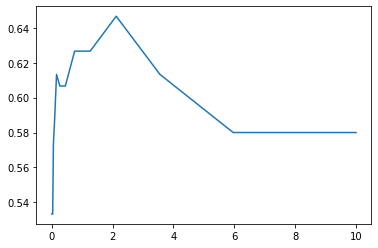

In [15]:
score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

0.6333333333333333 1.2340816326530613


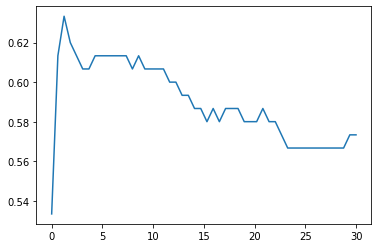

0.6533333333333333 8.57857142857143


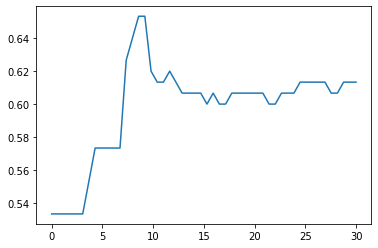

0.5933333333333334 6.877551020408163


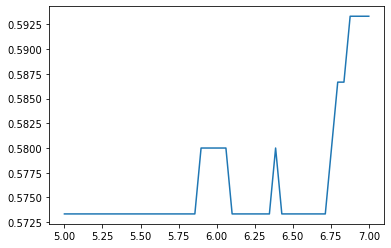

In [25]:
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()
 
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()
 
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 
0.012742749857031322,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()